### **Table of Content**

* Differential Equations
* Cononical Form
* Solvers and stuff
* Examples and code (Important)


#### **Differential Equations**

An equation that related the derivative of the function with the parameters of the function and the function value itself. For example: 

$$
\begin{aligned}
    \frac{df}{dx} &= f  &\text{Exponential}
    \\
    \frac{df}{dx} &= rf(1 - f/N) & \text{Logistic}
\end{aligned}
$$

For they can be a system of equations, for example the [Lotka Volterra](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations) System: 

$$
\begin{cases}
    \frac{dx}{dt} &= \alpha x - \beta xy
    \\
    \frac{dy}{dt} &= \delta xy - \gamma y
\end{cases}
$$

Where $x,y$ models the populations of the predators and the prays. 


In class, we see another example of first order system of equations, the Lorenz Equation, under certain parameters, which is here: 

$$
\begin{cases}
    \frac{dx}{dt} &= \sigma(y - x)\\
    \frac{dy}{dt} &= x(\rho - z) - y\\
    \frac{dz}{dt} &= xy - \beta z
\end{cases}
$$
The parameter we had in class was: `beta=8/3; sigma=10; rho=28`; where professor might have used different symbols for the parameters. 

However, another **important** thing is that, given any higher order system of equation, we can transform it into **cononical form**. The cononical form refers to this form: s

$$
\begin{aligned}
    \frac{df}{dt} &= g(f, t)\\ 
    x &\in \mathbb{R}^n\\
    \frac{df}{dt} &: \mathbb{R} \mapsto \mathbb{R^n}\\
    g(x ,t)&: \mathbb{R^n}\times \mathbb{R} \mapsto \mathbb{R^n}
\end{aligned}
$$

I can expand that: 
$$
\begin{bmatrix}
    \frac{df_1}{dt}
    \\
    \frac{df_2}{dt}
    \\
    \vdots 
    \\
    \frac{df_n}{dt}
\end{bmatrix} = 
\begin{bmatrix}
    g_1(t, f_1, f_2, \cdots, f_n)
    \\
    g_2(t, f_1, f_2, \cdots, f_n)
    \\
    \vdots
    \\
    g_n(t, f_1, f_2, \cdots, f_n)
\end{bmatrix}
$$

The derivative for each component of the vector function that depends on time, is related to the time variable, and the output value of that function itself. 

Finaly, the example we did in class about the pendulum is: 

$$
\begin{aligned}
    \frac{d^2\theta}{dt^2} &= mgL\sin(\theta)
    \\
    \frac{d^2\theta}{dt^2} &= -c\sin(\theta)
    \\
    \begin{bmatrix}
        \theta 
        \\
        \theta' 
    \end{bmatrix}
    &= 
    \begin{bmatrix}
        w_1 \\ w_2
    \end{bmatrix}
    \\
    \implies \begin{bmatrix}
        \theta' \\ \theta'' 
    \end{bmatrix} &= \begin{bmatrix}
        w_1' \\ w_2'
    \end{bmatrix}
    \\
    \implies \begin{bmatrix}
        \theta' \\ \theta'' 
    \end{bmatrix} &= 
    \begin{bmatrix}
        w_2 \\ -c \sin(w_1)
    \end{bmatrix}
\end{aligned}
$$

It's now in the cannonical form.





Consider $y' = f(t, y)$

Euler's Method: 

$$y_{n+1} = y_n + f(t_n, y_n)(t_{n+1} - t_n)$$


where $y$ is $y(t)$, a function of time, and $y_n = y(t_n)$, the value of the function at time step $t_n$. 

Backward Euler's Method: 

$$
y_n = y_{n - 1} + \Delta tf(t_{n}, y_n)
$$

Oh no it's an equation of $y_n$, to get the next step we need to solve the equation which is kinda bad. But it will be stable for a larger range of $\delta t$ for simulations. 


### **Solvers and Stuff**

There are many, **many** different solvers, each of them target different type of equations and adapts to different properties, so if we were to into that details this will be a biology class. Let's take a look at the cononical solver `ode45`. It's implementing the **Runge Kutta Scheme**. 


suppose that the system we were given is in the form of $x' = f(x, t)$, then the Runge Kutta is summarized as: 

$x_{k+1} = x_{k} + \frac{\Delta t}{6}\left(f_1 + 2f_2 + 2f_3 + f_4\right)$, 

where

$f_1 = f(t_k, x_k)$, 

$f_2 = f\left(t_k + \frac{\Delta t}{2}, x_k + \frac{\Delta t}{2}f_1\right)$, 

$f_3 = f\left(t_k + \frac{\Delta t}{2}, x_k + \frac{\Delta t}{2}f_2\right)$, 

and 

$f_4 = f\left(t_k + \Delta t, x_k + \Delta t f_3\right)$.

This is just stepping $\delta t$  into the future. But this method has a local error of $\mathcal{O}(\Delta t^5)$, and globally it has an error of $\mathcal{O}(\Delta t^4)$. The local error is the error we made at each tiem step, and the global error is the error we made for the whole sequence of time steps. 

Suppose that the solution of the system is denoted as $\hat{x}_{n}$, then local error is measure by the average of $\Vert x_{n} - \hat{x}_{n}\Vert$ for all the steps. And the global error will be measure by $\Vert x_{N} - \hat{x}_N \Vert$, the error of the last step. 

So, here, I will cite the book from Professor Kutz, on page 59, he listed all the errors for some of the common methods: 

\begin{array}{lcc}
\hline \hline \text { scheme } & \text { local error } \epsilon_{k} & \text { global error } E_{k} \\
\hline \hline \text { Euler } & O\left(\Delta t^{2}\right) & O(\Delta t) \\
2 \text { nd order Runge-Kutta } & O\left(\Delta t^{3}\right) & O\left(\Delta t^{2}\right) \\
4 \text { th order Runge-Kutta } & O\left(\Delta t^{5}\right) & O\left(\Delta t^{4}\right) \\
2 \text { nd order Adams-Bashforth } & O\left(\Delta t^{3}\right) & O\left(\Delta t^{2}\right) \\
\hline \hline
\end{array}

Finally, the method `ode45` implemented in matlab is way smarter, under the hood it's using several scheme all together while stepping forward, the difference between different order of scheme tells it the error, and based on that, it dynamically re-adjust the step size to produce results that are grarantee to be bounded by some absolute/relative error defined by the users. 

**This is good for some system, but very bad for others, stiff system kills this algorithm.**

In the case of stiff system, consider stiff solver in matlab, one of the good one is: `ode15s`

A stiff system is a system where, the derivative of the solution is changing very rapidly. 

### **How to Use it**...? 
| language |Method | Description|
|----------|-------|------------|
|Python    |[scipy.integerate.odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) |Takes in: (the RHS of your differential equation, Initial conditions, Time series), and returns the states of the system pack into each row of a matrix. |
|Malab|[`ode45`](https://www.mathworks.com/help/matlab/ref/ode45.html)|Takes in (the RHS of your differential, time series, initial conditions), returns [t, Y], where t is the time series for the system, and Y is the states of the system packed into the rows of a matrix. |
|python| [scipy.integrate.solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)| Takes in: (fun, tspan, y0, tval=None), and it returns an object, containing a lot of information, I would print it out and see what the fields are representing. |

Ok, take notice that, I am passing in a **FUNCTION** into another **FUNCTION**, this is valid math and valid Functional Programming in computer science. 

Let's get clear about the basics. 

When you take derivative, you are passing in a function to the differential operators and the point you want to get the derivative off, and it returns the value of derivative at that point. 

In Computer Programming, a higher order function takes in another function as a parameters and manipulates it. I used one simple example to take the integral using trapzoid rule last week. And this week, we see that scipy is giving us an higher order function as an API method. 

What is 

Lambda Expression (python), Anonymous Function (Matlab), are function that can be passed like a value. Normal function can only be refers to, but passing it can't be used for Higher Order function that returns a function instead of a value. 

I am just skipping the surface here, functional programming as a programming paradigm in computer science is a big topic.

Let's take a look at the example: 

In [1]:
def Compose(f:callable, g:callable, x):
    return f(g(x))  # evaluate the composition of the functions at x

def Composition(f:callable, g:callable):
    return lambda x: f(g(x))  # returns the composition as a function 

f = lambda x: 2*x
g = lambda x: x**2

# f(g(x)) = 2*(x**2)
# g(f(x)) = (2*x)**2
print(Compose(f, g, 2))  # should be 8 because 2*(2**2)
print(Compose(g, f, 2))  # should be 16
fg = Composition(f, g)
gf = Composition(g, f)  # gets back a function. 
print(fg(2))
print(gf(2))



8
16
8
16


### **Lotka Volterra** (Example)

$$  
\begin{cases}
    \frac{dx}{dt} &= \alpha x - \beta xy
    \\
    \frac{dy}{dt} &= \delta xy - \gamma y
\end{cases}
$$

$x$ is the population of prays, and $y$ is the populations of predators. This model will have closed trajectories on the strictly positive quadrant of the 2d plane. 

Let $\alpha = \frac{2}{3}, \beta = \frac{4}{3}, \gamma=\delta=1$: 

$$
\begin{cases}
    \frac{dx}{dt} &= \frac{2}{3} x - \frac{4}{3} xy
    \\
    \frac{dy}{dt} &=  xy - y
\end{cases}
$$

Initial Conditions is $(0.9, 1.8)$. We wish to simulate it from $t = 0$ to $t = 30$. 

When using it, we need to pass in a function, representing the RHS of the equation, which takes in input of `(states, t)`, which is the differential systems's outputs at that time moment. 

[[0.9        0.8845456  0.86938065 ... 0.18278336 0.18317791 0.18357982]
 [1.8        1.7980615  1.79585013 ... 0.33981063 0.3370456  0.33430441]]


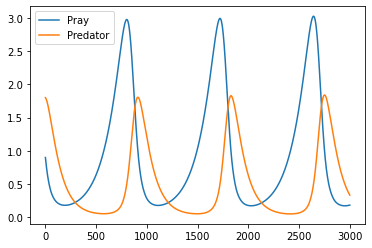

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
# from scipy.integrate import solve_ivp




Text(0, 0.5, 'Predactor')

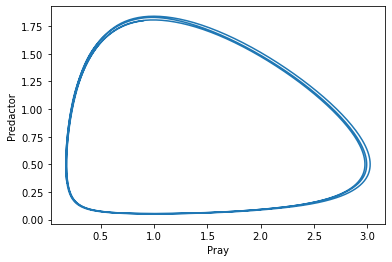

### **Time Dependent Events Based Lotka Volterra** 

Suppose that somebody killed predator at some point in time, what is going to happen to the system? 
